# Student Performance Analysis
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 

We have classified these students into three categories, "good", "fair", and "poor", according to their final exam performance. Then We analyzed a few features that have significant influence on students' final performance, including Romantic Status, Alcohol Consumption, Parents Education Level, Frequency Of Going Out, Desire Of Higher Education and Living Area. Finally, leveraging avaiable features, We have created various machine learning models to predict students' final performance classification and have compared models performance based on one-out sample accuracy score.

Dataset available at: http://archive.ics.uci.edu/ml/datasets/Student+Performance#

#### Table of Content
1. Import Packages
2. Load Dataset
3. Data Preparation
4. Exploratory Data Analysis
     - 4.1 Final Grade Distribution
     - 4.2 Correlation Heatmap
     - 4.3 Romantic Status
     - 4.4 Alcohol Consumption
     - 4.5 Parents Education Level
     - 4.6 Frequency Of Going Out
     - 4.7 Desire Of Higher Education
     - 4.8 Urban Vs. Rural Students
     - 4.9 Considering previous failures
     - 4.10 Internet Availability
5. Classification
     - 5.1 Prepare Dataset For Modelling
     - 5.2 Decision Tree Classifier
     - 5.3 Random Forest Classifier
     - 5.4 Support Vector Classifier
     - 5.5 Logistic Regression Classifier
     - 5.6 ANN - 2 Layer
     - 5.7 Naive Bayes
     - 5.8 Prediction results using different models
6. Summary

## 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

## 2. Load Dataset

In [2]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')

## 3. Data Preparation

In [3]:
# merge datasets
df = pd.concat([mat,por])

In [4]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [5]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


# Let's have a look at the variables!

In [6]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

<h4>Note: There are no missing values!</h4>

# 4. Exploratory Data Analysis

### 4.1 Final Grade Distribution

Text(0, 0.5, 'Number of Student')

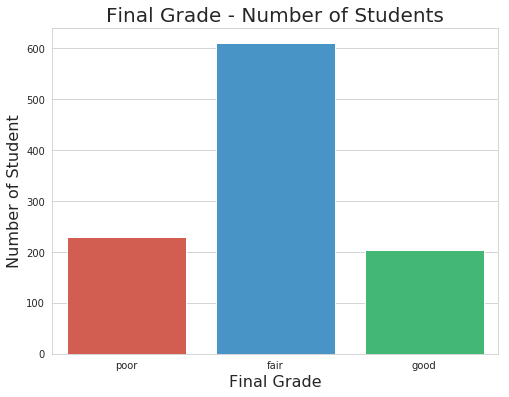

In [7]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
flatui = ["#e74c3c","#3498db", "#2ecc71"]
sns.countplot(df.final_grade, order=["poor","fair","good"], palette=flatui)
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

###        

-------------------------------------------------------------------------------------------------------------------------------

### 4.2 Correlation Heatmap

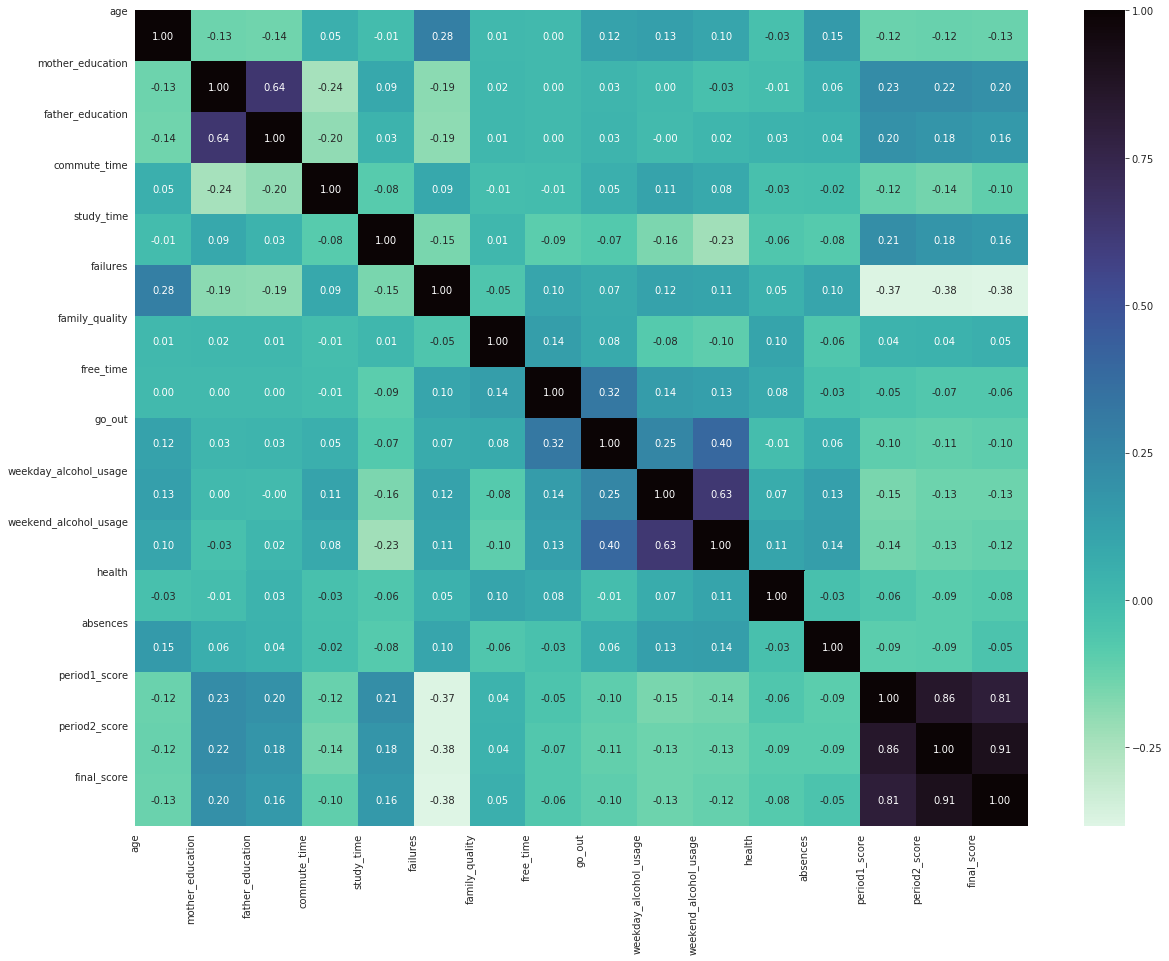

In [8]:
# see correlation between variables through a correlation heatmap
def correlation(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    colormap = sns.diverging_palette(150,50, as_cmap=True)
    sns.heatmap(corr, cmap="mako_r", annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.savefig('Correlation.png', bbox_inches='tight')
    plt.show()
correlation(df)

### 4.3 Final Grade By Romantic Status
see how students in a romantic relationship vs. those not in a relationship perform 

In [9]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

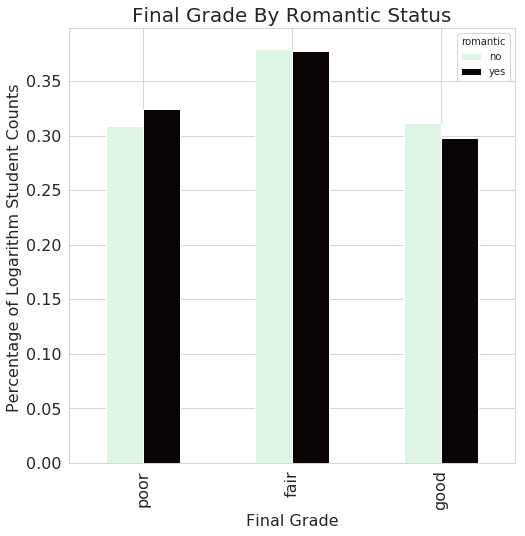

In [10]:
plt.figure()
romance_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

### Romantic status affects the final grade. In poor performing students, Students with relationships are more than with no relationships. The opposite is true for good performing students.


<br><br><br>
### 4.4 Final Grade By Alcohol Consumption
See how alcohol consumption influences students' final grade

In [11]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Level of Alcohol Consumption')

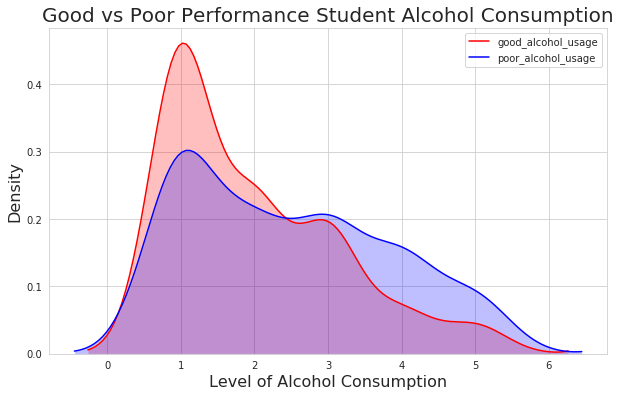

In [12]:
pd.options.mode.chained_assignment = None  # default='warn'


# create good student dataframe
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good vs Poor Performance Student Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

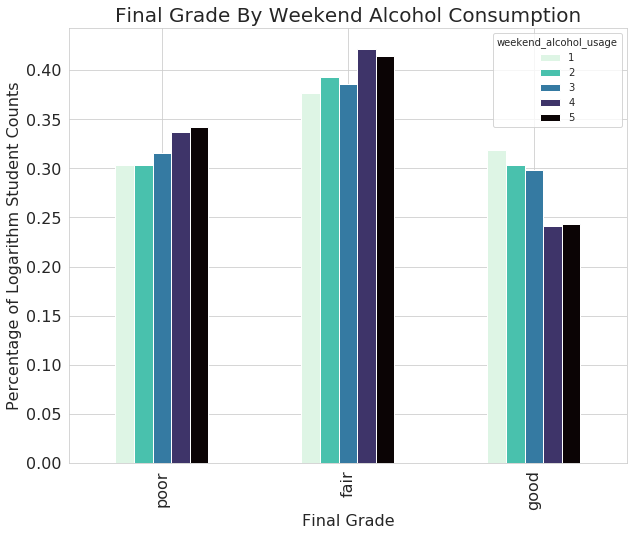

In [13]:
alc_perc.plot.bar(colormap="mako_r", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

<br><br><br>
### 4.5 Final Grade By Parents Education Level
See how parents' education level influence student performance

In [14]:
pd.options.mode.chained_assignment = None  # default='warn'

good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

Text(0.5, 0, 'Father Education Level')

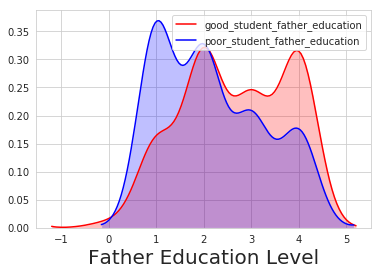

In [15]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)

Text(0.5, 0, 'Mother Education Level')

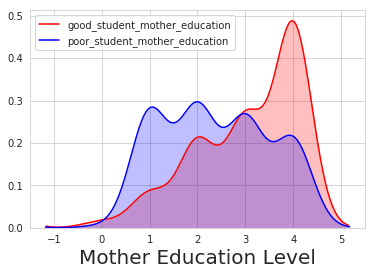

In [16]:
# see the difference between good and poor performers' mother education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)

### OLS tells that parents' education level has a positive correlation with students' final score. Comparatively, mother's education level has bigger influence than father's education level!

In [17]:
# use OLS to see coefficients
X_edu = df[['mother_education','father_education']]
y_edu = df.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_score   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2287.
Date:                Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:14:09   Log-Likelihood:                -3194.8
No. Observations:                1044   AIC:                             6394.
Df Residuals:                    1042   BIC:                             6403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.4078      0.166     14.527      0.000       2.083       2.733
father_education     1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br><br><br>
### 4.6 Final Grade By Frequency Of Going Out
See how frequency of goig out with friend influence students' final performance

Text(0.5, 0, 'Frequency of Going Out')

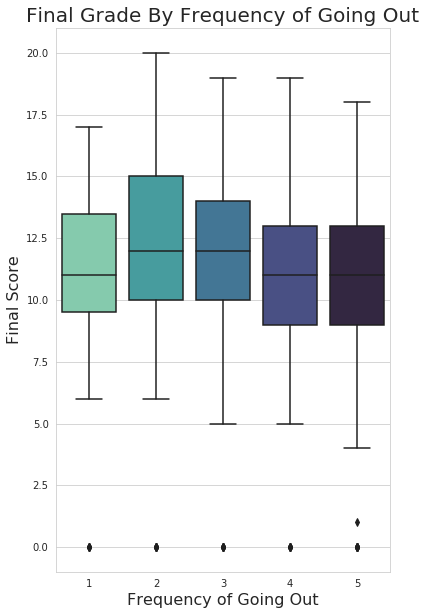

In [18]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='mako_r')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

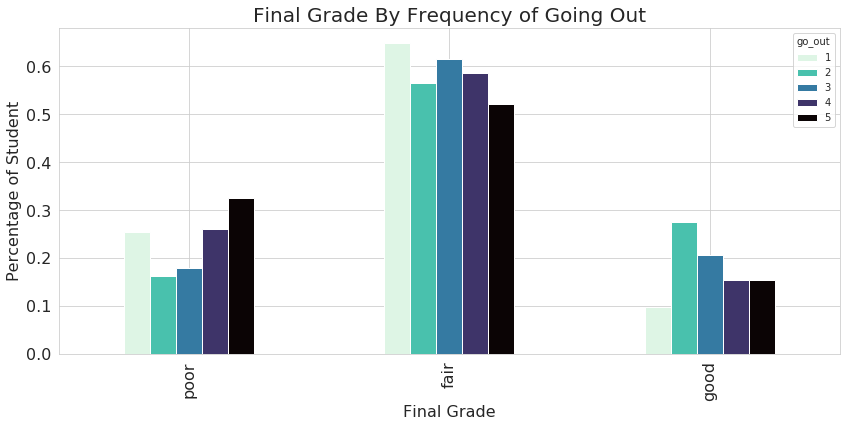

In [19]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

### The frequency of going out with friends has a significant correlation with students' final performance.

<br><br><br>
### 4.7 Final Grade By Desire To Go To College
see how desire to go to college influence student final performance

Text(0.5, 0, 'Age')

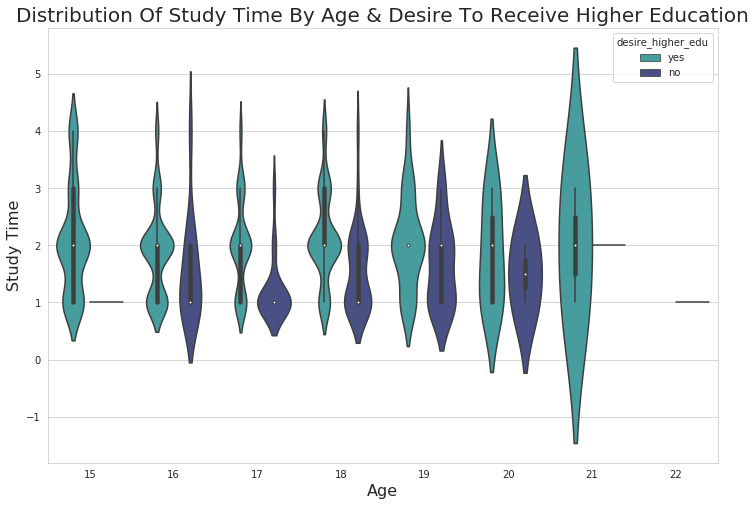

In [20]:
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="mako_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [21]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

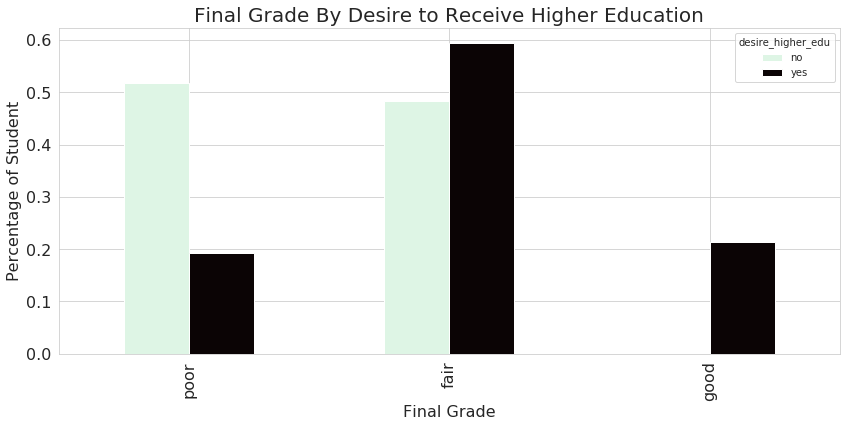

In [22]:
higher_perc.plot.bar(colormap="mako_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

### The desire of going to college has a significant correlation with students' final performance.

<br><br><br>
### 4.8 Final Grade By Living Area
See how the final performance difference between students living in the city and those living in rural areas

In [23]:
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

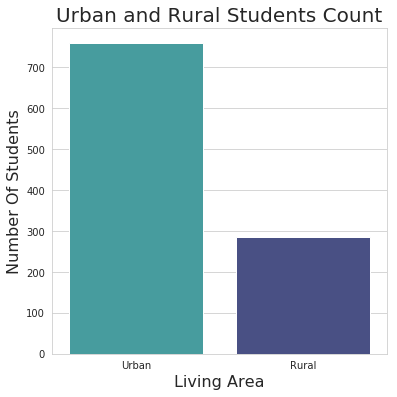

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(df.address, palette='mako_r')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [25]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

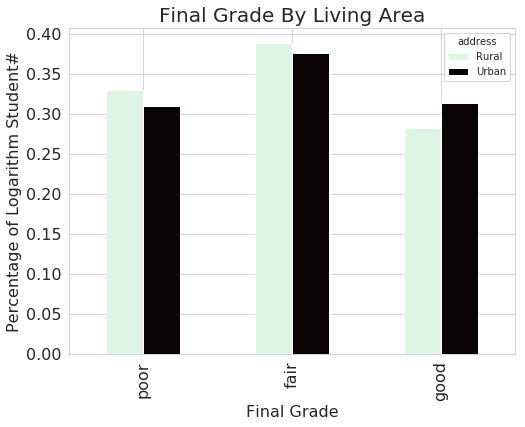

In [26]:
ad_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

### The living area has a significant correlation with students' final performance.

<br><br><br>
### 4.9 Final Grade By Failures
see how the final performance difference between students based on the number of times they have failed previously

Text(0.5, 0, 'Final Grade')

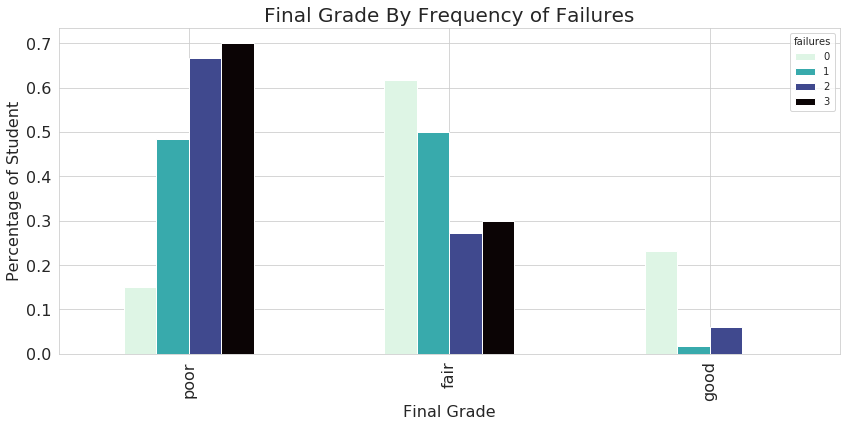

In [27]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.failures)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Failures', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

### The frequency of previous failures has a significant correlation with students' final performance.

<br><br><br>
### 4.10 Final Grade By Internet Status
see how the final performance difference between students based on their internet status

Text(0.5, 0, 'Final Grade')

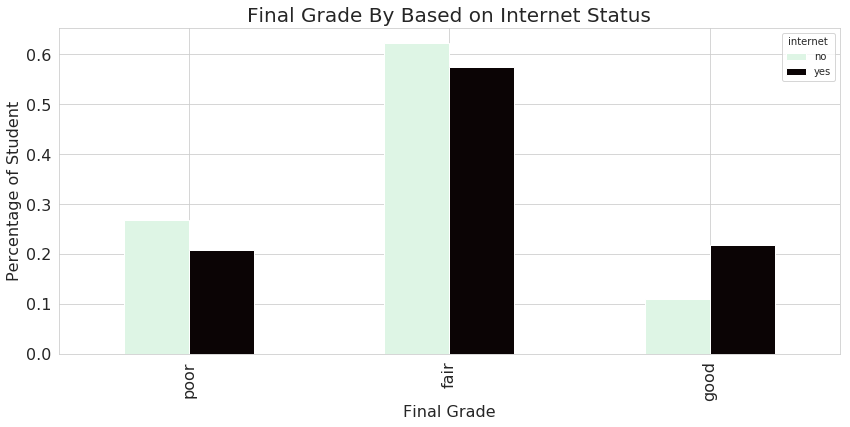

In [28]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.internet)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Based on Internet Status', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

### The internet status has a significant correlation with students' final performance.

<br><br><br>
# 5. Classification
### Use Students' Information To Predict Their Final Grade

### 5.1 Prepare Dataset for Modelling

In [29]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [30]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [31]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [32]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [33]:
# see total number of features
len(list(X_train))

58

In [34]:
from sklearn.metrics import confusion_matrix
#By definition a confusion matrix C is such that C(i,j) is equal to the number of observations known to be in group i but 
#predicted to be in group j.
#Thus in binary classification, the count of true negatives is C(0,0), false negatives is C(1,0), 
#true positives is C(1,1) and false positives is C(0,1).
def confusionmatrix(y_val,y_pred):
    labels = list(range(0,21))
    cm=confusion_matrix(y_val,y_pred)
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    total = lambda x : x.sum()/3
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('percentage of sensitivity = '+str(total(TPR)*100))

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('percentage of precision = '+str(total(PPV)*100))
    # Negative predictive value
    NPV = TN/(TN+FN)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('Accuracy percentage = '+str(total(ACC)*100))

### 5.2 Decision Tree Classification

In [35]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58): # recall: 58 is the total no of features
    tree = DecisionTreeClassifier(min_samples_leaf=i) # min_samples_leaf: The minimum number of samples required to be at a leaf node
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna() # printing the optimal no. of minimum sample leaf w.r.t. sore of the test dataset

38    0.872611
39    0.872611
40    0.872611
41    0.872611
46    0.872611
47    0.872611
48    0.872611
49    0.872611
50    0.872611
51    0.872611
52    0.872611
53    0.872611
54    0.872611
55    0.872611
56    0.872611
dtype: float64

Decision Tree Model Score : 0.9054794520547945 , Cross Validation Score : 0.8439490445859873
percentage of sensitivity = 82.45744963958023
percentage of precision = 81.57880819771148
Accuracy percentage = 89.59660297239914


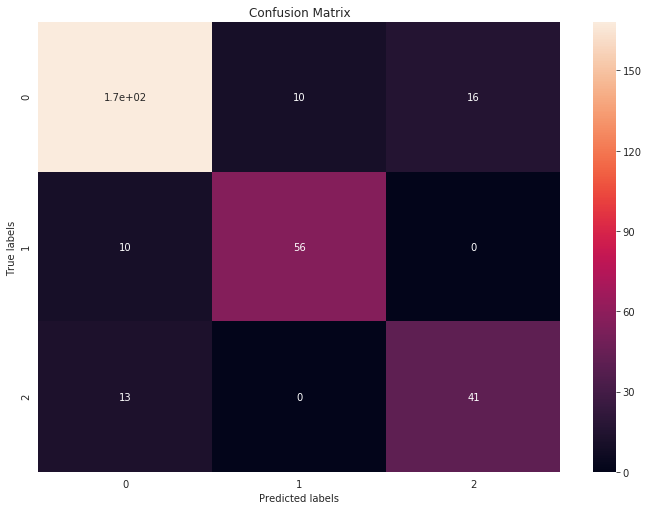

In [36]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17) # building the final model
t= tree.fit(X_train, y_train) # training the model
print("Decision Tree Model Score" , ":" , t.score(X_train, y_train) , "," , "Cross Validation Score" ,":" , t.score(X_test, y_test))
y_pred = t.predict(X_test) # predicting the test dataset
confusionmatrix(y_test,y_pred) # confusion matrix b/w test(actual) and predicted

### 5.3 Random Forest Classification

In [37]:
# find a good # of estimators

#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and uses averaging to improve the predictive 
#accuracy and control over-fitting. The sub-sample size is always the same as the original 
#input sample size but the samples are drawn with replacement if bootstrap=True (default).

from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,100):
    forest = RandomForestClassifier(n_estimators=i) #n_estimator: no. of trees in the forest. by default it is 100
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
est=ne.where(ne==ne.max()).dropna() #printing the no. of estimators where score is max w.r.t. the test dataset
est

37    0.875796
68    0.875796
88    0.875796
dtype: float64

In [38]:
# after finding a good no. of estimators, we have to find the minimum samples leaf for them
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=est.index[0], min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
leaf=ne.where(ne==ne.max()).dropna()
leaf

3     0.872611
10    0.872611
dtype: float64

Random Forest Model Score : 0.9534246575342465 , Cross Validation Score : 0.8662420382165605
percentage of sensitivity = 81.43635669408866
percentage of precision = 86.92475732431339
Accuracy percentage = 91.0828025477707


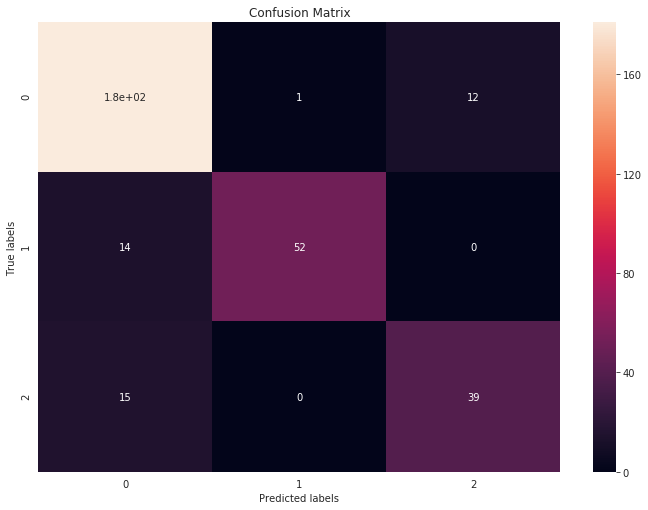

In [39]:
# final model
forest = RandomForestClassifier(n_estimators=est.index[0], min_samples_leaf=leaf.index[0])
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," , "Cross Validation Score" ,":" , f.score(X_test, y_test))
y_pred = forest.predict(X_test)
confusionmatrix(y_test,y_pred)

### 5.4 Support Vector Classification

SVC Model Score : 0.9493150684931507 , Cross Validation Score : 0.856687898089172
percentage of sensitivity = 82.47827646453075
percentage of precision = 84.05896512424917
Accuracy percentage = 90.44585987261145


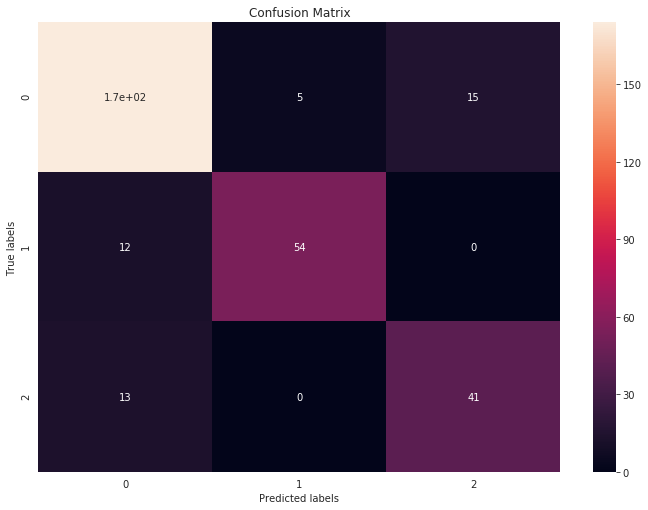

In [40]:
#A SVM model is a representation of the examples as points in space, mapped so that the examples of the separate 
#categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same 
#space and predicted to belong to a category based on which side of the gap they fall.
from sklearn.svm import SVC
svc = SVC(gamma="auto")
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," , "Cross Validation Score" ,":" , s.score(X_test, y_test))
y_pred = s.predict(X_test)
confusionmatrix(y_test,y_pred)

### 5.5 Logistic Regression

Logistic Regression Model Score : 0.9219178082191781 , Cross Validation Score : 0.8439490445859873
percentage of sensitivity = 82.68191653071378
percentage of precision = 81.84889755182768
Accuracy percentage = 89.59660297239914


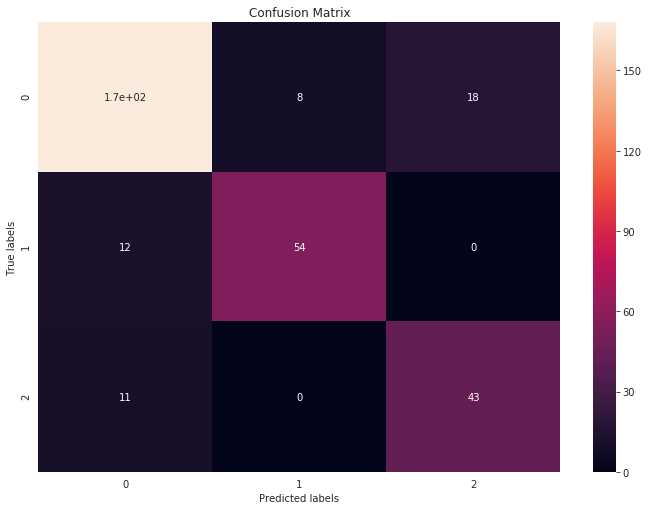

In [41]:
from sklearn.linear_model import LogisticRegression

lr =  LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)
lr = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression Model Score" , ":" , lr.score(X_train, y_train) , "," ,      "Cross Validation Score" ,":" , lr.score(X_test, y_test))
confusionmatrix(y_test,y_pred)

### 5.6 ANN 2 layer

ANN Model Score : 0.9123287671232877 , Cross Validation Score : 0.8280254777070064
percentage of sensitivity = 81.26511391116202
percentage of precision = 79.87166497804795
Accuracy percentage = 88.53503184713377


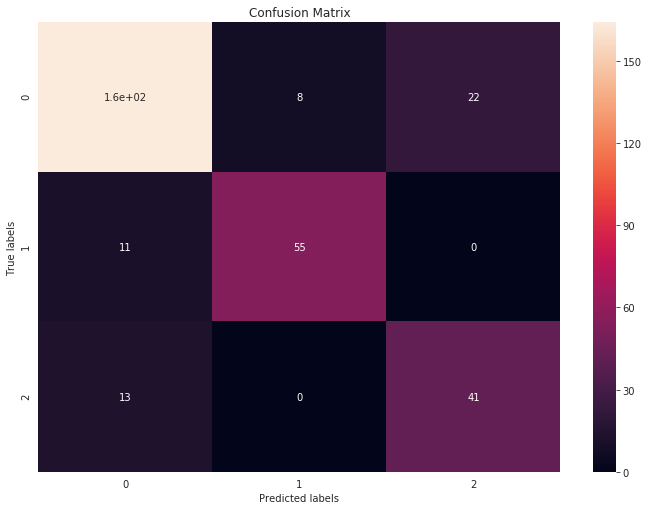

In [42]:
#An artificial neural network is an interconnected group of nodes. 
#Here, each circular node represents an artificial neuron with activation functions and an arrow 
#represents a connection from the output of one artificial neuron to the input of another.
from sklearn.neural_network import MLPClassifier
#this current network has:
#solver: optimization technique for adjusting weights. here we use lbfgs
#alpha: L2 penalty (regularization term) parameter
#hidden_layer_sizes: in our model, we have 2 hidden layers with 5 neurons each
#randon state: random_state is the seed used by the random number generator
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
sf1 = clf.fit(X_train, y_train) #training the model
print("ANN Model Score" , ":" , sf1.score(X_train, y_train) , "," , "Cross Validation Score" ,":" , sf1.score(X_test, y_test))
y_pred = sf1.predict(X_test) #predicting the model
confusionmatrix(y_test,y_pred) 

### 5.7 Naive Bayes

Naive Bayes Model Score : 0.6684931506849315 , Cross Validation Score : 0.6878980891719745
percentage of sensitivity = 65.36036192393581
percentage of precision = 63.70188370188371
Accuracy percentage = 79.19320594479831


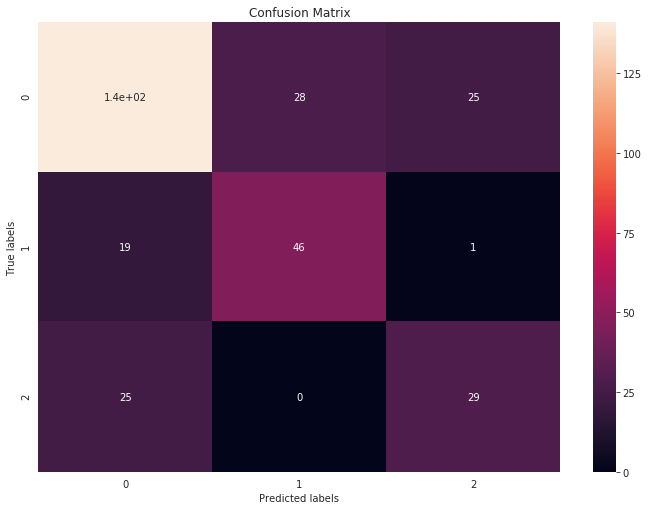

In [43]:
#Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption 
#of conditional independence between every pair of features given the value of the class variable
from sklearn.naive_bayes import MultinomialNB
#MultinomialNB implements the naive Bayes algorithm for multinomially distributed data
#The distribution is parametrized by vectors Vy=(Vy1,Vy2,Vy3,...Vyn) for each class y, 
#where n is the number of features and Vyi is the probability P(xi|y) of feature i appearing in a sample belonging to class y.
gnb = MultinomialNB() 
nv = gnb.fit(X_train, y_train)
print("Naive Bayes Model Score" , ":" , nv.score(X_train, y_train) , "," , "Cross Validation Score" ,":" , nv.score(X_test, y_test))
y_pred = nv.predict(X_test)
confusionmatrix(y_test,y_pred)

### 5.8 Prediction results using different models

In [46]:
i=20
map =['poor', 'fair', 'good']
print ("Correct rating is : ",map[y_test.iloc[i]])
(X_test.loc[[X_test.index[i]]])

Correct rating is :  good


,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,...,activities_no,activities_yes,nursery_no,nursery_yes,desire_higher_edu_no,desire_higher_edu_yes,internet_no,internet_yes,romantic_no,romantic_yes
255,18,3,3,2,1,1,4,1,1,1,...,1,0,0,1,1,0,0,1,1,0


In [47]:
print ("Decision Tree Prediction is : ",map[t.predict(X_test.iloc[i].values.reshape(1, -1))[0]])
print ("Random Forest Prediction is : ",map[forest.predict(X_test.iloc[i].values.reshape(1, -1))[0]])
print ("SVM Prediction is : ",map[s.predict(X_test.iloc[i].values.reshape(1, -1))[0]])
print ("Logistic Regression Prediction is : ",map[lr.predict(X_test.iloc[i].values.reshape(1, -1))[0]])
print ("ANN Prediction is : ",map[clf.predict(X_test.iloc[i].values.reshape(1, -1))[0]])
print ("Naive Bayes Prediction is : ",map[gnb.predict(X_test.iloc[i].values.reshape(1, -1))[0]])

Decision Tree Prediction is :  good
Random Forest Prediction is :  good
SVM Prediction is :  good
Logistic Regression Prediction is :  good
ANN Prediction is :  good
Naive Bayes Prediction is :  good
